<a href="https://colab.research.google.com/github/abhayychoudhary/Machine-learning/blob/master/multi_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('data/Corona_NLP_train.csv',encoding = "ISO-8859-1")
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


# New section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = df[pd.notnull(df['OriginalTweet'])]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.2+ MB


In [ ]:
col = ['OriginalTweet', 'Sentiment']
df = df[col]

In [ ]:
df.rename(columns={'OriginalTweet': 'Text', 'Sentiment': 'Intent'}, inplace=True)

In [ ]:
df

,Text,Intent
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
# df.columns = ['Product', 'Consumer_complaint_narrative']
df['text_id'] = df['Intent'].factorize()[0]

In [ ]:
df

,Text,Intent,text_id
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,advice Talk to your neighbours family to excha...,Positive,1
2,Coronavirus Australia: Woolworths to give elde...,Positive,1
3,My food stock is not the only one which is emp...,Positive,1
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,2
...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,0
41153,Response to complaint not provided citing COVI...,Extremely Negative,2
41154,You know itÂs getting tough when @KameronWild...,Positive,1
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,0


In [ ]:
df['text_id'] = df['Intent'].factorize()[0]
from io import StringIO
category_id_df = df[['Intent', 'text_id']].drop_duplicates().sort_values('text_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['text_id', 'Intent']].values)

In [ ]:
category_to_id

{'Neutral': 0,
 'Positive': 1,
 'Extremely Negative': 2,
 'Negative': 3,
 'Extremely Positive': 4}

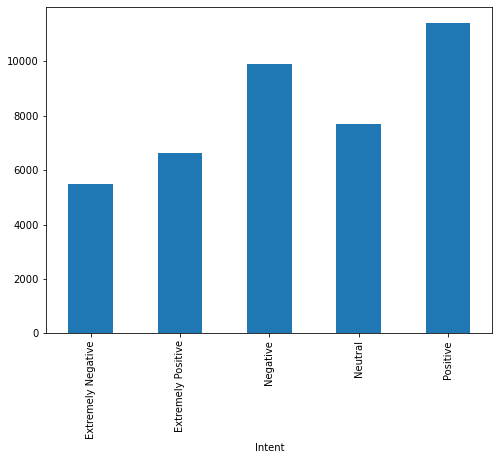

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Intent').Text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Text).toarray()
labels = df.text_id
features.shape

(41157, 24198)

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Intent, text_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == text_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Intent))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Extremely Negative':
  . Most correlated unigrams:
       . panic
       . crisis
  . Most correlated bigrams:
       . stop panic
       . panic buying
# 'Extremely Positive':
  . Most correlated unigrams:
       . best
       . great
  . Most correlated bigrams:
       . stay safe
       . hand sanitizer
# 'Negative':
  . Most correlated unigrams:
       . hand
       . demand
  . Most correlated bigrams:
       . oil prices
       . hand sanitizer
# 'Neutral':
  . Most correlated unigrams:
       . toiletpaper
       . https
  . Most correlated bigrams:
       . panic buying
       . hand sanitizer
# 'Positive':
  . Most correlated unigrams:
       . hand
       . panic
  . Most correlated bigrams:
       . panic buying
       . hand sanitizer


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Intent'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
X_train_tfidf

<30867x65445 sparse matrix of type '<class 'numpy.float64'>'
	with 861115 stored elements in Compressed Sparse Row format>

In [ ]:
print(clf.predict(count_vect.transform(["when i will get form 16"])))

['Positive']


In [ ]:
print(clf.predict(count_vect.transform(["how is the product"])))

['Positive']


In [ ]:
df[df['Text'] == "how is the product"]

,Text,Intent,text_id


In [ ]:
# df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

In [ ]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Intent.values, yticklabels=category_id_df.Intent.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from IPython.display import display

for predicted in category_id_df.text_id:
  for actual in category_id_df.text_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Intent', 'Text']])
      print('')

In [ ]:
model.fit(features, labels)

In [ ]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

In [ ]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Intent'].unique()))

In [ ]:
text_features